In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [3]:
trips = pd.read_csv('data/trip_data/trip_data_11.csv')

trips.shape

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_8793/2752665082.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('data/trip_data/trip_data_11.csv')


(14388451, 14)

In [4]:
trips.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,CMT,1,N,2013-11-25 15:53:33,2013-11-25 16:00:51,1,437,0.6,-73.978104,40.752968,-73.985756,40.762684
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,CMT,1,N,2013-11-25 15:24:41,2013-11-25 15:30:18,1,336,0.5,-73.982315,40.764828,-73.982132,40.758888
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,CMT,1,N,2013-11-25 09:43:42,2013-11-25 10:02:57,1,1154,3.3,-73.982010,40.762508,-74.006851,40.719582
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,CMT,1,N,2013-11-25 06:49:58,2013-11-25 07:04:22,1,864,3.8,-73.976006,40.744480,-74.016060,40.717297
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,CMT,1,N,2013-11-25 10:02:12,2013-11-25 10:17:15,1,902,2.2,-73.952621,40.780964,-73.981628,40.777977


In [5]:
trips.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 rate_code               int64
 store_and_fwd_flag     object
 pickup_datetime        object
 dropoff_datetime       object
 passenger_count         int64
 trip_time_in_secs       int64
 trip_distance         float64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
dtype: object

In [6]:
# some columns have leading whitespace so lets remove it
trips.columns = [i.strip() for i in trips.columns] 
trips.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [7]:
trips.memory_usage(deep=True) 

Index                        128
medallion             1280572139
hack_license          1280572139
vendor_id              863307060
rate_code              115107608
store_and_fwd_flag     645962376
pickup_datetime       1093522276
dropoff_datetime      1093522276
passenger_count        115107608
trip_time_in_secs      115107608
trip_distance          115107608
pickup_longitude       115107608
pickup_latitude        115107608
dropoff_longitude      115107608
dropoff_latitude       115107608
dtype: int64

# Data dictionary
#### https://learn.microsoft.com/en-us/azure/open-datasets/dataset-taxi-yellow?tabs=azureml-opendatasets

# vendor_id

In [28]:
# 2 vendor_id
# VTS - VeriFone Transportation Systems
# CMT - Creative Mobile Technologies

trips.vendor_id.value_counts(dropna=False)

vendor_id
VTS    7251507
CMT    7136944
Name: count, dtype: int64

# rate_code

In [29]:
# https://www.nyc.gov/assets/tlc/downloads/pdf/taxi_information.pdf

# The final rate code in effect at the end of the trip. 
# 1= Standard rate; 
# 2= JFK; ?and manhattan?
# 3= Newark; 
# 4= Nassau or Westchester; 
# 5= Negotiated fare; ?ooc negotiated rate?
# 6= Group ride.

# 0,7,8,9,210? to be removed

trips.rate_code.value_counts(dropna=False).sort_index()

rate_code
0          1242
1      14074886
2        246583
3         21953
4          4470
5         39145
6           148
7             4
8             3
9             2
10            2
210          13
Name: count, dtype: int64

# store_and_fwd_flag

In [30]:
# This flag indicates whether the trip record was held in vehicle memory 
# before sending to the vendor, also known as “store and forward,” 
# because the vehicle did not have a connection to the server. 
# Y= store and forward trip; N= not a store and forward trip.

trips.store_and_fwd_flag.value_counts(dropna=False).sort_index()

store_and_fwd_flag
N      6999327
Y       136517
NaN    7252607
Name: count, dtype: int64

# passenger_count

In [31]:
# number of passengers in the taxi
# remove where 0 or 7+
trips.passenger_count.value_counts(dropna=False).sort_index()

passenger_count
0           869
1      10085655
2       2027512
3        621673
4        301112
5        789652
6        561945
7            12
8             8
9            11
208           2
Name: count, dtype: int64

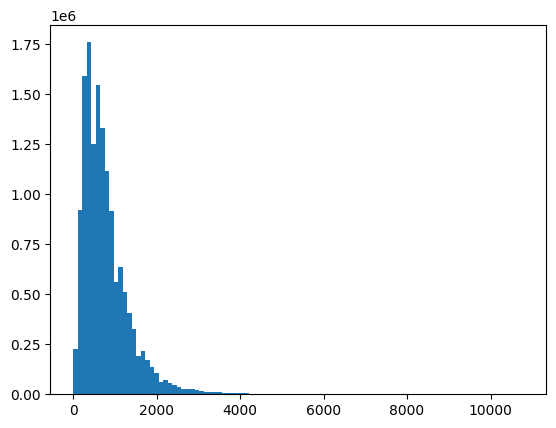

In [31]:
plt.hist(trips['trip_time_in_secs'], bins=100)
plt.show()

In [12]:
trips.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,CMT,1,N,2013-11-25 15:53:33,2013-11-25 16:00:51,1,437,0.6,-73.978104,40.752968,-73.985756,40.762684
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,CMT,1,N,2013-11-25 15:24:41,2013-11-25 15:30:18,1,336,0.5,-73.982315,40.764828,-73.982132,40.758888
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,CMT,1,N,2013-11-25 09:43:42,2013-11-25 10:02:57,1,1154,3.3,-73.982010,40.762508,-74.006851,40.719582
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,CMT,1,N,2013-11-25 06:49:58,2013-11-25 07:04:22,1,864,3.8,-73.976006,40.744480,-74.016060,40.717297
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,CMT,1,N,2013-11-25 10:02:12,2013-11-25 10:17:15,1,902,2.2,-73.952621,40.780964,-73.981628,40.777977


In [13]:
trips.shape

(14388451, 14)

In [ ]:
# Drop rows
# passenger_count = 0
# trip_distance = 0
# trip_time_in_secs = 0
# pickup_longitude = 0.0
# pickup_latitude = 0.0
# dropoff_longitude = 0.0
# dropoff_latitude = 0.0

In [ ]:
# indices to drop from df
df[~df.index.isin(indices)]

# Dropping rows with invalid values

In [32]:
print("Rows with passenger_count=0:", len(trips[trips['passenger_count']==0]))
print("Rows with trip_time_in_secs=0:", len(trips[trips['trip_time_in_secs']==0]))
print("Rows with trip_distance=0:", len(trips[trips['trip_distance']==0.0]))
print("Rows with rate_code in [0,7,8,9,210]:", len(trips[trips['rate_code'].isin([0,7,8,9,210])]))

# print("Rows with pickup_longitude=0:", len(trips.loc[trips['pickup_longitude']==0.0]))

Rows with passenger_count=0: 869
Rows with trip_time_in_secs=0: 41388
Rows with trip_distance=0: 77304
Rows with rate_code in [0,7,8,9,210]: 1264


In [25]:
passenger_count_indices_to_drop = trips[trips['passenger_count']==0].index.tolist()
trip_time_in_secs_indices_to_drop = trips[trips['trip_time_in_secs']==0].index.tolist()
trip_distance_indices_to_drop = trips[trips['trip_distance']==0.0].index.tolist()
rate_code_indices_to_drop = trips[trips['rate_code'].isin([0,7,8,9,210])].index.tolist()

indices_to_drop = list(set(passenger_count_indices_to_drop + 
                           trip_time_in_secs_indices_to_drop + 
                           trip_distance_indices_to_drop + 
                          rate_code_indices_to_drop))

print(f"Distinct rows dropped: {len(indices_to_drop)}")

Distinct rows dropped: 90542


In [26]:
df = trips[~trips.index.isin(indices_to_drop)]
df.shape

(14297909, 14)

# Exploratory Analysis
1. What are busiest locations and hours?
2. How are passengers per trip, payment type, fare and tip amounts distributed?
3. How do times and fares vary by trips?
4. Is it possible to characterise taxi drivers based on work hours and how much they make?